In [200]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
#create initail 5 by 5 array, all values are none
arr = np.empty((5,5), dtype=object)
arr[:] = None
arr

array([[None, None, None, None, None],
       [None, None, None, None, None],
       [None, None, None, None, None],
       [None, None, None, None, None],
       [None, None, None, None, None]], dtype=object)

In [202]:
arr[0,1] = 15
arr[1,0] = 18
arr[1,1] = 16
arr[2,0] = 21
arr[3,0] = 24
arr[4,0] = 20
arr[4,1] = 23


arr

array([[None, 15, None, None, None],
       [18, 16, None, None, None],
       [21, None, None, None, None],
       [24, None, None, None, None],
       [20, 23, None, None, None]], dtype=object)

In [203]:
# Convert the array to a fully numeric format (replacing None with NaN)
inital_array = arr.copy()


In [204]:
def plot_array(arr):
    arr_copy = arr.copy()
    numeric_array = np.array(arr_copy, dtype=float)
    # Plotting the grid
    plt.figure(figsize=(8, 6))
    plt.imshow(numeric_array, cmap='viridis_r', interpolation='none')  # 'viridis' is just one of many available colormaps
    plt.colorbar(label='Values')  # Adds a color bar to the side
    plt.title('2D Array Grid Plot')
    plt.xlabel('Column')
    plt.ylabel('Row')

    # Adding the values as text on the grid
    for (i, j), val in np.ndenumerate(numeric_array):
        if not np.isnan(val):  # Only adding text for non-NaN values
            plt.text(j, i, round(val,1), ha='center', va='center', color='white')
    for (i, j), val in np.ndenumerate(inital_array):
        if val is not None:
            plt.text(j, i, round(float(val),1), ha='center', va='center', color='red')

    plt.show()

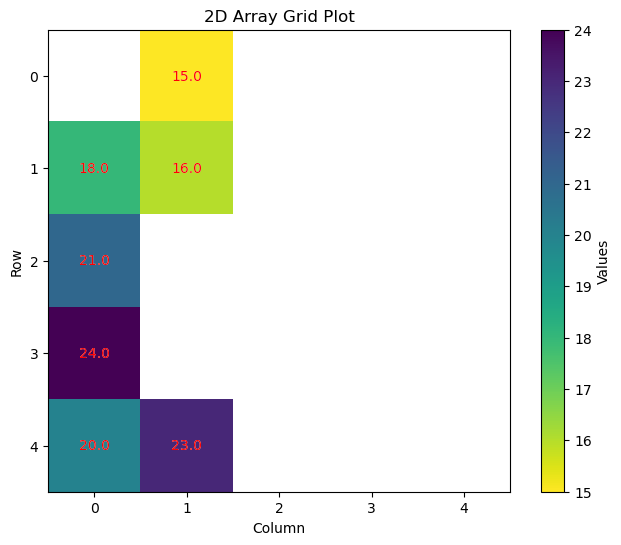

In [205]:
plot_array(arr)

In [206]:
#
# Function to calculate the inverse distance weight
rows = len(arr)
cols = len(arr[0]) if rows else 0

def interploation(arr_in):
# Function to check if a cell and its neighbors are not None
    def idw_calculate(arr_in, r, c,power = 2):

        # Directions 
        directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

        weights = 0
        values = 0
        
        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            # Check if neighbor is within bounds and not None
            if 0 <= nr < rows and 0 <= nc < cols:
                if arr[nr][nc] is not None:
                    #print(dr,dc)
                    weights+=1
                    values += arr_in[nr][nc]
        return values / weights if weights != 0 else None


    new_arr = arr_in.copy()

    for i in range(rows):
        for j in range(cols):
            #if val is None and its neighbors are not None, then calculate the idw value
            if arr[i][j] is None :
                #print(arr[i][j])
                new_arr[i, j] = idw_calculate(arr_in, i, j)

    return new_arr

arr = interploation(arr)
arr
    #return input_array

array([[16.5, 15, 15.0, None, None],
       [18, 16, 16.0, None, None],
       [21, 18.5, None, None, None],
       [24, 23.5, None, None, None],
       [20, 23, 23.0, None, None]], dtype=object)

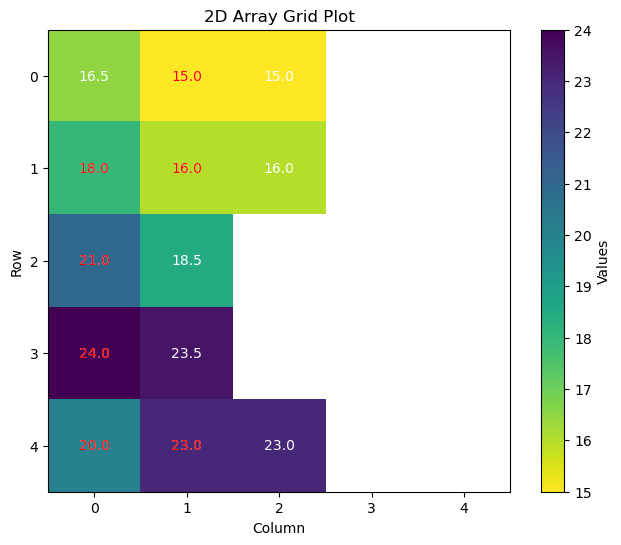

In [207]:
plot_array(arr)

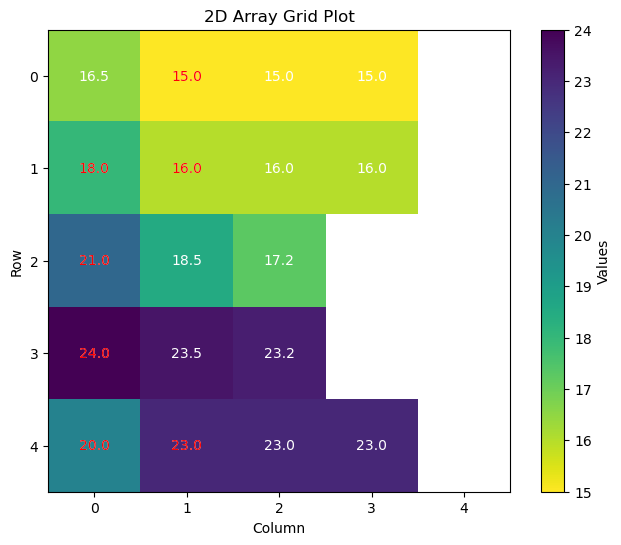

In [208]:
arr = interploation(arr)
plot_array(arr)

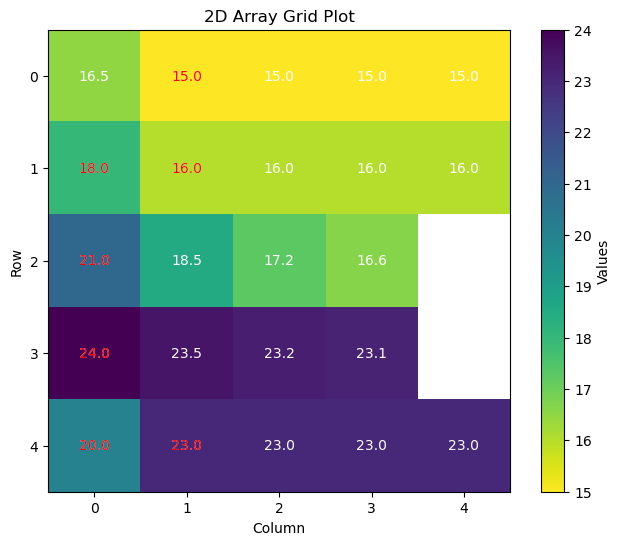

In [209]:
arr = interploation(arr)
plot_array(arr)

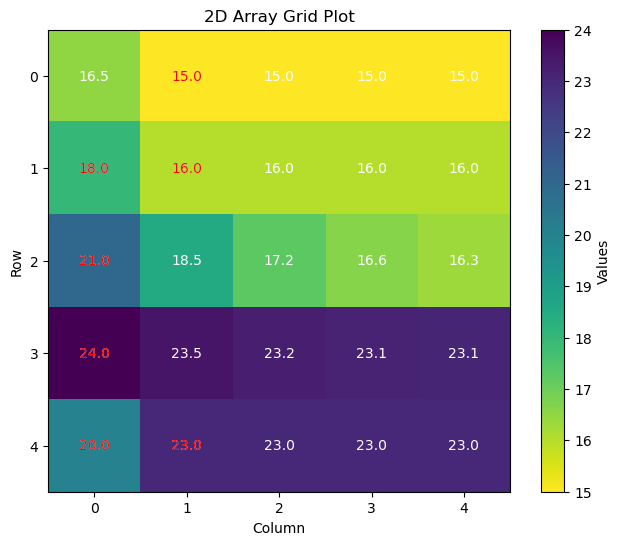

In [210]:
arr = interploation(arr)
plot_array(arr)

In [213]:
import plotly.graph_objects as go
import numpy as np

# Example 2D array (replace this with your array)
array = arr

# Create x and y coordinates for the grid
x = np.arange(array.shape[1])
y = np.arange(array.shape[0])

# Create a meshgrid for the surface plot
x_grid, y_grid = np.meshgrid(x, y)

# Create the surface plot
fig = go.Figure(data=[go.Surface(z=array, x=x_grid, y=y_grid)])

# Update the layout
fig.update_layout(title='3D Surface Plot of 2D Array', autosize=False,
                  width=1500, height=1500,
                  scene=dict(

                            aspectratio=dict(x=1, y=1, z=0.3)  # Adjust these values as needed
                        ),
                  margin=dict(l=65, r=50, b=65, t=90))

# Show the plot
fig.show()
